55/55. Good job Thomas. 

In [71]:
#python version 3.11.4  conda version 23.7.3
import pandas as pd # v 1.5.3
import numpy as np # v 1.26.1
import sklearn # v 0.0.3
import pmdarima as pm # v 2.0.3
import statsmodels.api as sm # v 0.14.0
import matplotlib.pyplot as plt # 3.7.1
import sweetviz as sv # 2.2.1
import pytest_warnings as ww #v 0.3.1
import warnings as w
import statsmodels.tsa.stattools as stattools  # v 0.14.0
import matplotlib.pyplot as plt # 3.7.1

from sklearn.svm import SVC
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller # v 0.14.0
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.14.0
from statsmodels.tsa.arima_model import ARIMA # v 0.14.0

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score



from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from mlxtend.feature_selection import SequentialFeatureSelector #0.23.0

from sklearn.model_selection import KFold

In [72]:
cb = pd.read_csv(r"/Users/thomassniezek/Downloads/company_bankruptcy_data.csv")#r tells it to run row file path

In [73]:
cb.shape, cb.columns, cb.dtypes # this code tells how many columns there are, the names of the columns and the type each column is. It also says how many rows,in this case, there are 6819. 96 columns 

((6819, 96),
 Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
        ' ROA(A) before interest and % after tax',
        ' ROA(B) before interest and depreciation after tax',
        ' Operating Gross Margin', ' Realized Sales Gross Margin',
        ' Operating Profit Rate', ' Pre-tax net Interest Rate',
        ' After-tax net Interest Rate',
        ' Non-industry income and expenditure/revenue',
        ' Continuous interest rate (after tax)', ' Operating Expense Rate',
        ' Research and development expense rate', ' Cash flow rate',
        ' Interest-bearing debt interest rate', ' Tax rate (A)',
        ' Net Value Per Share (B)', ' Net Value Per Share (A)',
        ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
        ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
        ' Operating Profit Per Share (Yuan ¥)',
        ' Per Share Net profit before tax (Yuan ¥)',
        ' Realized Sales Gross Profit Growth Rate

In [74]:
cb['Bankrupt'].value_counts(normalize=True) #shows the y is not balanced. one is .967 and the other is .032

0    0.967737
1    0.032263
Name: Bankrupt, dtype: float64

In [75]:
cb.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [76]:
my_report = sv.analyze(cb)

                                             |          | [  0%]   00:00 -> (? left)

In [77]:
my_report.show_html() 

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [78]:
X = cb.drop('Bankrupt', axis=1)  # Features
y = cb['Bankrupt']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)


In [80]:
# Combine the training features and target variable
train_data = pd.concat([X_train, y_train], axis=1)

In [81]:
# Count the number of samples in each class
class_counts = train_data['Bankrupt'].value_counts()

In [82]:
print("Class Distribution Before Undersampling:")
print(class_counts)

Class Distribution Before Undersampling:
0    4626
1     147
Name: Bankrupt, dtype: int64


In [83]:
# Undersample the majority class using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [84]:
resampled_data = pd.concat([X_resampled, y_resampled], axis=1) #Combined the resampled features and target variable

In [85]:
resampled_class_counts = resampled_data['Bankrupt'].value_counts() #Count the number of samples in each class after undersampling

In [86]:
#Display the class distribution after undersampling
print("\nClass Distribution After Undersampling:")
print(resampled_class_counts)


Class Distribution After Undersampling:
0    147
1    147
Name: Bankrupt, dtype: int64


In [87]:
X1 = resampled_data.drop('Bankrupt', axis=1)  # Features
y1 = resampled_data['Bankrupt']

In [88]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=6)

In [89]:
random_forest_model = RandomForestClassifier(random_state=42) #initiate the random forest with default parameters

In [90]:
%%time
random_forest_model.fit(X_train, y_train) #fit the model

CPU times: user 3.12 s, sys: 97.9 ms, total: 3.22 s
Wall time: 3.42 s


RandomForestClassifier(random_state=42)

In [91]:
y_pred = random_forest_model.predict(X_test) # Made predictions on the test set
y_prob = random_forest_model.predict_proba(X_test)[:, 1]

In [92]:
#Evaluates the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)


In [93]:
print("Random Forest Model with Default Parameters:") #prints out our findings
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)
print("\nConfusion Matrix:\n", confusion_mat)
print("ROC AUC Score:", roc_auc)

Random Forest Model with Default Parameters:
Accuracy: 0.967741935483871

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1973
           1       0.77      0.14      0.23        73

    accuracy                           0.97      2046
   macro avg       0.87      0.57      0.61      2046
weighted avg       0.96      0.97      0.96      2046


Confusion Matrix:
 [[1970    3]
 [  63   10]]
ROC AUC Score: 0.9224774177422601


In [94]:
# After printing these metrics, I am deciding to use the ROC-AUC curve because it is an imbalanced dataset. The score of .92 is quite good. 


In [95]:
random_forest_model_non_default = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest, usually benefits model performance
    max_depth=10,       # Maximum depth of the tree, helps prevent overfitting
    min_samples_split=5,# Minimum number of samples required to split an internal node, helps to prevent overfitting
    criterion = 'entropy',
    random_state=42
)

In [96]:
%%time
random_forest_model_non_default.fit(X_train, y_train)
#fit the model and check the time it takes to run 

CPU times: user 2.05 s, sys: 39.4 ms, total: 2.09 s
Wall time: 2.14 s


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)

In [97]:
# Make probability predictions on the test set
y_prob_non_default = random_forest_model_non_default.predict_proba(X_test)[:, 1]
y_pred_non_default = random_forest_model_non_default.predict(X_test)

In [98]:
# Compute ROC AUC score
roc_auc_non_default = roc_auc_score(y_test, y_prob_non_default)
accuracy_non = accuracy_score(y_test, y_pred_non_default)
classification_report_str_non = classification_report(y_test, y_pred_non_default)
confusion_mat_non = confusion_matrix(y_test, y_pred_non_default)

In [99]:
print("Random Forest Model with Non-Default Parameters:")
 #prints out our findings
print("Accuracy:", accuracy_non)
print("\nClassification Report:\n", classification_report_str_non)
print("\nConfusion Matrix:\n", confusion_mat_non)
print("ROC AUC Score:", roc_auc_non_default)

Random Forest Model with Non-Default Parameters:
Accuracy: 0.969208211143695

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1973
           1       0.78      0.19      0.31        73

    accuracy                           0.97      2046
   macro avg       0.87      0.59      0.65      2046
weighted avg       0.96      0.97      0.96      2046


Confusion Matrix:
 [[1969    4]
 [  59   14]]
ROC AUC Score: 0.9433378000263836


In [100]:
#The default one took longer for me to fit. The CPU time of the default took 3.2 seconds while the non-default one I made took 2.09 seconds. 
#This could be because maybe the defualt one had a larger max depth than the one I created which could cause it to take a longer time. 


In [101]:
chosen_tree_index = 0  # Change this index to choose a different tree
chosen_tree = random_forest_model_non_default.estimators_[chosen_tree_index]

In [102]:
tree_rules = export_text(chosen_tree, feature_names=list(X.columns)) #exports the tree and shows what he rules are
print("Decision Rules for Chosen Tree:")
print(tree_rules)

Decision Rules for Chosen Tree:
|---  Net Income to Stockholder's Equity <= 0.83
|   |---  Current Ratio <= 0.00
|   |   |---  Inventory/Current Liability <= 2277000064.00
|   |   |   |---  Net Value Per Share (B) <= 0.15
|   |   |   |   |--- class: 1.0
|   |   |   |---  Net Value Per Share (B) >  0.15
|   |   |   |   |--- class: 0.0
|   |   |---  Inventory/Current Liability >  2277000064.00
|   |   |   |--- class: 0.0
|   |---  Current Ratio >  0.00
|   |   |---  ROA(A) before interest and % after tax <= 0.45
|   |   |   |---  Total Asset Return Growth Rate Ratio <= 0.26
|   |   |   |   |--- class: 1.0
|   |   |   |---  Total Asset Return Growth Rate Ratio >  0.26
|   |   |   |   |---  Accounts Receivable Turnover <= 0.00
|   |   |   |   |   |---  Net Value Per Share (A) <= 0.15
|   |   |   |   |   |   |---  Cash Flow to Sales <= 0.67
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |---  Cash Flow to Sales >  0.67
|   |   |   |   |   |   |   |---  Inventory/Current

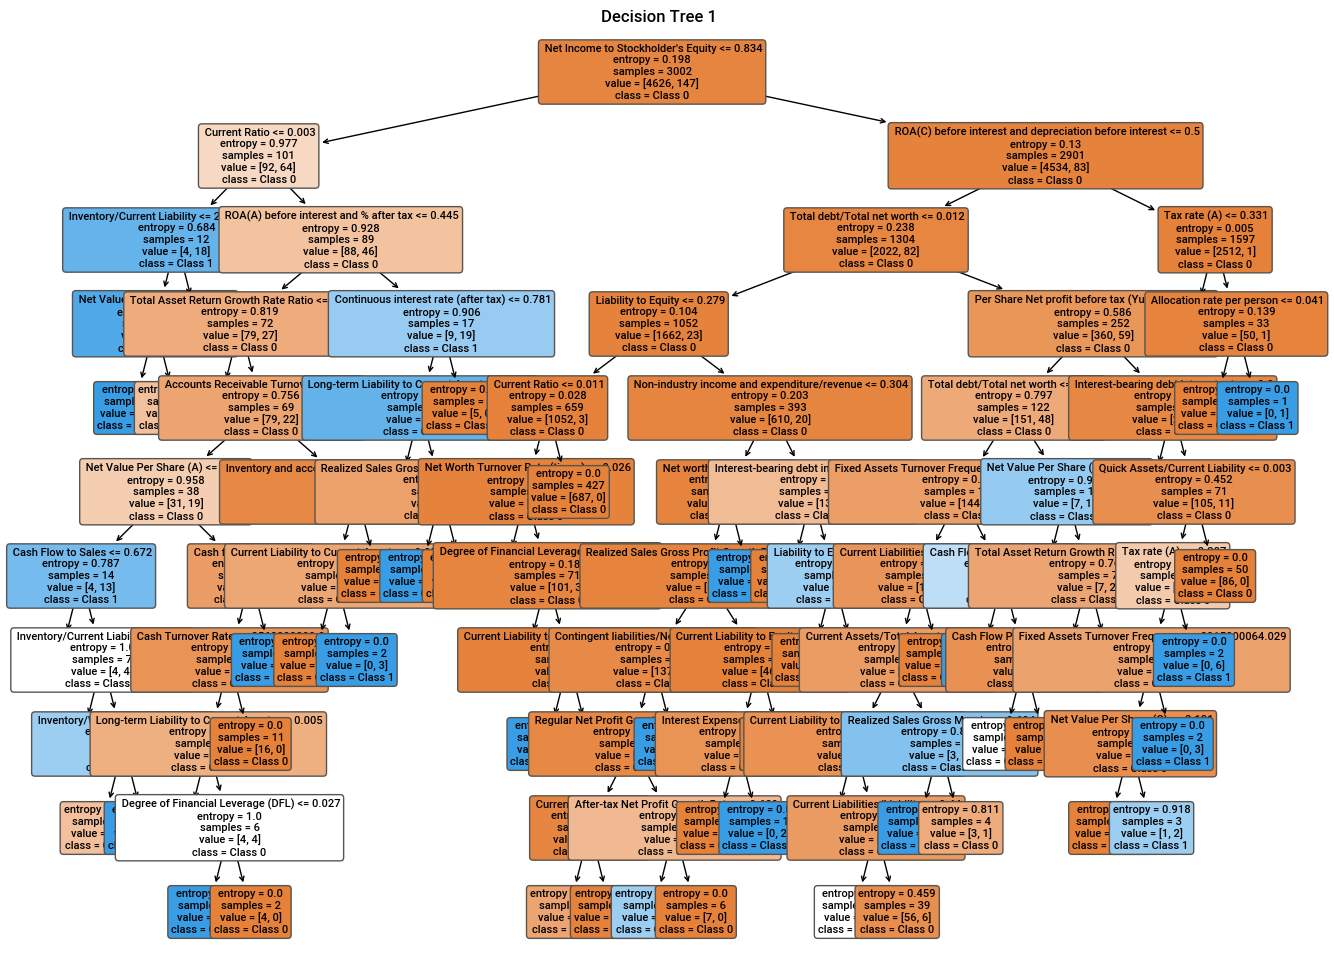

In [103]:
plt.figure(figsize=(16, 12))
plot_tree(chosen_tree, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True,fontsize=8 )
plt.title(f"Decision Tree {chosen_tree_index + 1}")
plt.show() #takes the tree and puts it in plot form, it is a little easier to follow than previous plot. 

In [104]:
feature_importances = random_forest_model_non_default.feature_importances_
# Gets the feature importances

In [105]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}) # Creates a DataFrame to organize the feature importances

In [106]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#Sorts the DataFrame by importance in descending order

In [107]:
print("Feature Importances:") #prints out the most impoprtant features
print(feature_importance_df)

Feature Importances:
                                     Feature  Importance
39                      Borrowing dependency    0.042491
37                          Net worth/Assets    0.032856
35                Total debt/Total net worth    0.031984
18   Persistent EPS in the Last Four Seasons    0.031429
29                     Net Value Growth Rate    0.031204
..                                       ...         ...
75                    Fixed Assets to Assets    0.004168
55               Current Assets/Total Assets    0.003694
40          Contingent liabilities/Net worth    0.003347
84                     Liability-Assets Flag    0.000000
93                           Net Income Flag    0.000000

[95 rows x 2 columns]


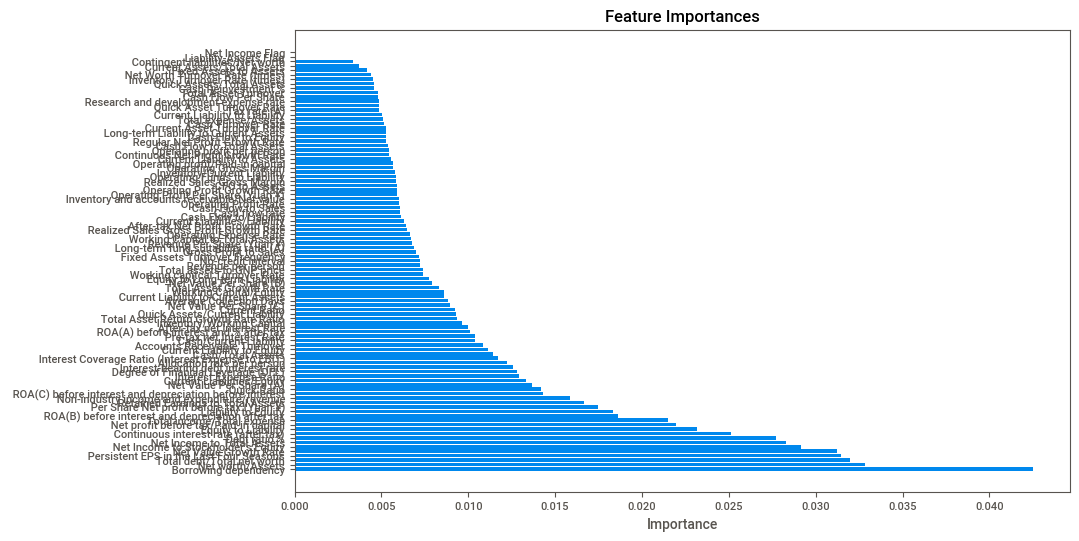

In [108]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show() #creates a visualization using the most important features

In [109]:
# Initialize the SVM model with default parameters
svm_model = SVC(probability = True) #probability = True allows for me to make an ROC curve

In [110]:
# Fit the model on the training set
%time svm_model.fit(X_train, y_train)


CPU times: user 2.64 s, sys: 86.5 ms, total: 2.73 s
Wall time: 2.92 s


SVC(probability=True)

In [111]:
y_prob_svm = svm_model.predict_proba(X_test)[:, 1,]

In [112]:
y_pred = svm_model.predict(X_test)

In [113]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

/Users/thomassniezek/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomassniezek/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomassniezek/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
# Report findings
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc_svm)

Accuracy: 0.9643206256109482

Confusion Matrix:
 [[1973    0]
 [  73    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1973
           1       0.00      0.00      0.00        73

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.95      2046

ROC AUC Score: 0.5788209318956599


In [44]:
svm_model_linear = SVC(kernel='linear')#Initialize the SVM model with linear kernel

In [ ]:
# Fit the model on the training set

%time svm_model_linear.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_linear = svm_model_linear.predict(X_test)

In [115]:
random_forest_model = RandomForestClassifier(random_state=6) #initiate the random forest with default parameters

In [116]:
%%time
random_forest_model.fit(X1_train, y1_train) #fit the model

CPU times: user 185 ms, sys: 6.08 ms, total: 192 ms
Wall time: 199 ms


RandomForestClassifier(random_state=6)

In [117]:
y1_pred = random_forest_model.predict(X1_test) # Made predictions on the test set
y1_prob = random_forest_model.predict_proba(X1_test)[:, 1]

In [118]:
#Evaluates the model
accuracy1 = accuracy_score(y1_test, y1_pred)
classification_report_str1 = classification_report(y1_test, y1_pred)
confusion_mat1 = confusion_matrix(y1_test, y1_pred)
roc_auc1 = roc_auc_score(y1_test, y1_prob)

In [119]:
print("Random Forest Model with Default Parameters:") #prints out our findings
print("Accuracy:", accuracy1)
print("\nClassification Report:\n", classification_report_str1)
print("\nConfusion Matrix:\n", confusion_mat1)
print("ROC AUC Score:", roc_auc1)

Random Forest Model with Default Parameters:
Accuracy: 0.7865168539325843

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.68      0.75        41
           1       0.76      0.88      0.82        48

    accuracy                           0.79        89
   macro avg       0.79      0.78      0.78        89
weighted avg       0.79      0.79      0.78        89


Confusion Matrix:
 [[28 13]
 [ 6 42]]
ROC AUC Score: 0.8841463414634146


In [120]:
# Initialize the SVM model with default parameters
svm_model = SVC(probability = True) #probability = True allows for me to make an ROC curve

In [121]:
# Fit the model on the training set
%time svm_model.fit(X1_train, y1_train)

CPU times: user 26.3 ms, sys: 2.94 ms, total: 29.2 ms
Wall time: 27.9 ms


SVC(probability=True)

In [122]:
y_prob_svm1 = svm_model.predict_proba(X1_test)[:, 1,] #predicts prob for ROC

In [123]:
y_pred1 = svm_model.predict(X1_test) #predicts

In [124]:
# Evaluate the model
accuracy2 = accuracy_score(y1_test, y1_pred)
conf_matrix2 = confusion_matrix(y1_test, y1_pred)
classification_rep2 = classification_report(y1_test, y1_pred)
roc_auc_svm2 = roc_auc_score(y1_test, y_prob_svm1)

In [125]:
# Report findings
print("Accuracy:", accuracy2)
print("\nConfusion Matrix:\n", conf_matrix2)
print("\nClassification Report:\n", classification_rep2)
print("ROC AUC Score:", roc_auc_svm2)

Accuracy: 0.7865168539325843

Confusion Matrix:
 [[28 13]
 [ 6 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.68      0.75        41
           1       0.76      0.88      0.82        48

    accuracy                           0.79        89
   macro avg       0.79      0.78      0.78        89
weighted avg       0.79      0.79      0.78        89

ROC AUC Score: 0.5767276422764227
